In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Data/citibike_2022_with_weather_sample.csv")
df.head()

C:\Users\mais1\AppData\Local\Temp\ipykernel_11228\1380376030.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/citibike_2022_with_weather_sample.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,C31A06A81423A14C,classic_bike,2022-01-18 07:40:25.346,2022-01-18 07:43:35.441,W 26 St & 8 Ave,6297.02,10 Ave & W 28 St,6459.04,40.747348,-73.997236,40.750664,-74.001768,member,2022-01-18,1.8
1,6104B30E6CC08F21,classic_bike,2022-01-18 20:13:23.444,2022-01-18 20:57:37.652,Jay St & York St,4895.09,Clark St & Henry St,4789.03,40.701403,-73.986727,40.697601,-73.993446,member,2022-01-18,1.8
2,127F7DF7F787F370,classic_bike,2022-01-01 02:26:22.776,2022-01-01 02:46:12.503,Greenwich St & Perry St,5922.04,E 13 St & Avenue A,5779.09,40.734980,-74.006970,40.729667,-73.980680,casual,2022-01-01,11.6
3,FF12FDCC260D47C3,classic_bike,2022-01-06 18:30:28.542,2022-01-06 18:44:35.763,Lexington Ave & E 36 St,6313.1,W 26 St & 10 Ave,6382.05,40.747574,-73.978801,40.749718,-74.002950,member,2022-01-06,4.9
4,D8402474AF50D5F1,classic_bike,2022-01-27 18:29:15.544,2022-01-27 18:30:52.077,31 St & 21 Ave,7202.07,31 St & Ditmars Blvd,7144.02,40.778130,-73.908420,40.776168,-73.910485,member,2022-01-27,-4.2


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [5]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [7]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                          object
avgTemp                      float64
dtype: object

In [8]:
df = df.set_index('started_at')

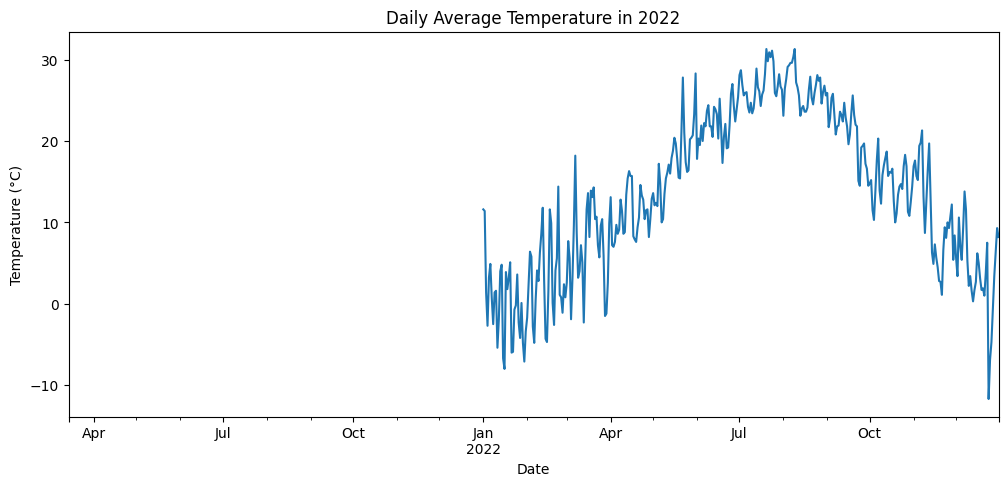

In [9]:
df_daily = df['avgTemp'].resample('D').mean()

df_daily.plot(figsize=(12,5), title="Daily Average Temperature in 2022")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

Although the file is named as if it only contained data for 2022, the time range actually starts in March 2021.

In [10]:
df.index.min(), df.index.max()

(Timestamp('2021-03-14 18:17:59.923000'),
 Timestamp('2022-12-31 23:53:48.435000'))

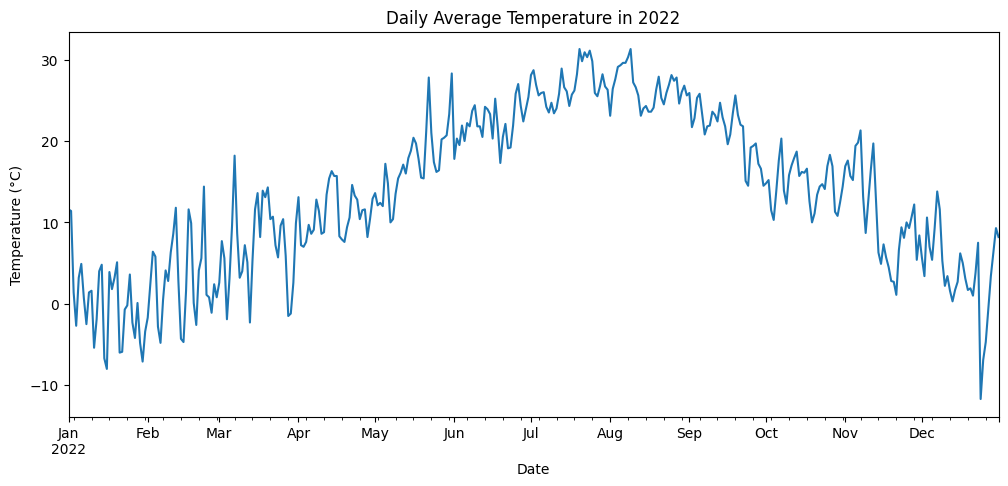

In [11]:
df_2022 = df[(df.index >= "2022-01-01") & (df.index < "2023-01-01")]

df_daily = df_2022['avgTemp'].resample('D').mean()
df_daily.plot(figsize=(12,5), title="Daily Average Temperature in 2022")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2022-12-31"))
plt.show()

In [12]:
df_2022 = df[(df.index >= "2022-01-01") & (df.index < "2023-01-01")].copy()

In [13]:
# Number of trips per day
trips_per_day = df_2022.resample('D').size().to_frame(name='trip_count')
trips_per_day.head()

,trip_count
started_at,
2022-01-01,2499
2022-01-02,5388
2022-01-03,4095
2022-01-04,4469
2022-01-05,4157


In [14]:
weather_daily = df_2022['avgTemp'].resample('D').mean().to_frame(name='avgTemp')
weather_daily.head()

,avgTemp
started_at,
2022-01-01,11.6
2022-01-02,11.4
2022-01-03,1.4
2022-01-04,-2.7
2022-01-05,3.2


In [15]:
merged_df = trips_per_day.merge(weather_daily, left_index=True, right_index=True)

merged_df.head()

,trip_count,avgTemp
started_at,,
2022-01-01,2499,11.6
2022-01-02,5388,11.4
2022-01-03,4095,1.4
2022-01-04,4469,-2.7
2022-01-05,4157,3.2


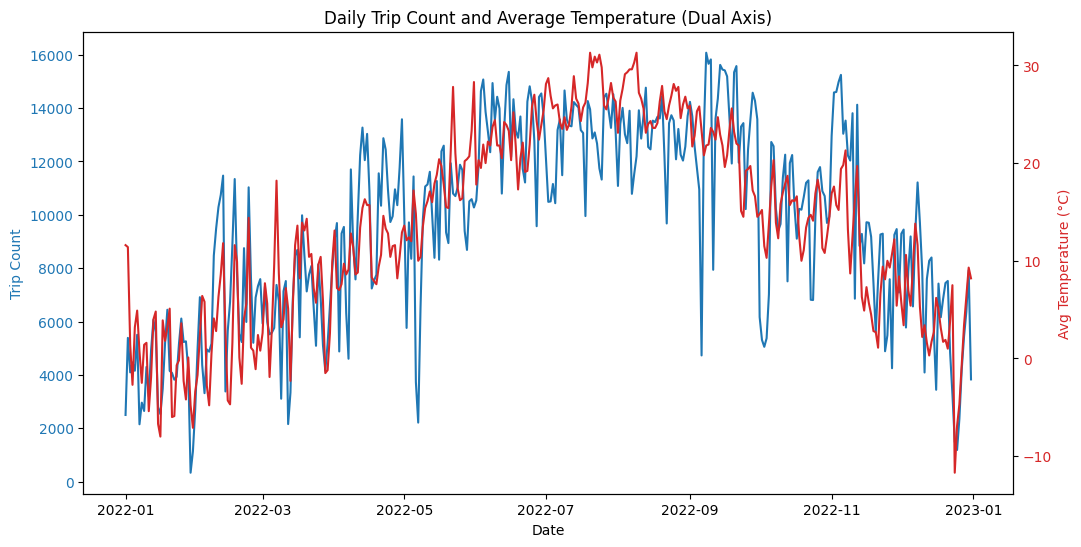

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Axis 1: Trip counts
ax1.plot(merged_df.index, merged_df['trip_count'], color='tab:blue', label='Trip Count')
ax1.set_xlabel("Date")
ax1.set_ylabel("Trip Count", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Axis 2: Temperature
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['avgTemp'], color='tab:red', label='Average Temperature')
ax2.set_ylabel("Avg Temperature (°C)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Daily Trip Count and Average Temperature (Dual Axis)")
plt.show()

I used Matplotlib’s object-oriented approach to create this dual-axis chart.
The first axis (ax1) plots daily trip counts, and the second axis (ax2), created using twinx(), plots average temperature.
Both lines share the same x-axis (dates) but use different y-axes, which makes it easy to compare the two trends.

## Bonus Task

In [ ]:
# Return started_at as a column
df['started_at'] = df.index

# Make sure ended_at is datetime
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [21]:
df_clean = df[df['tripduration'] <= 180]

In [22]:
df_clean = df[(df['tripduration'] > 0) & (df['tripduration'] <= 120)]

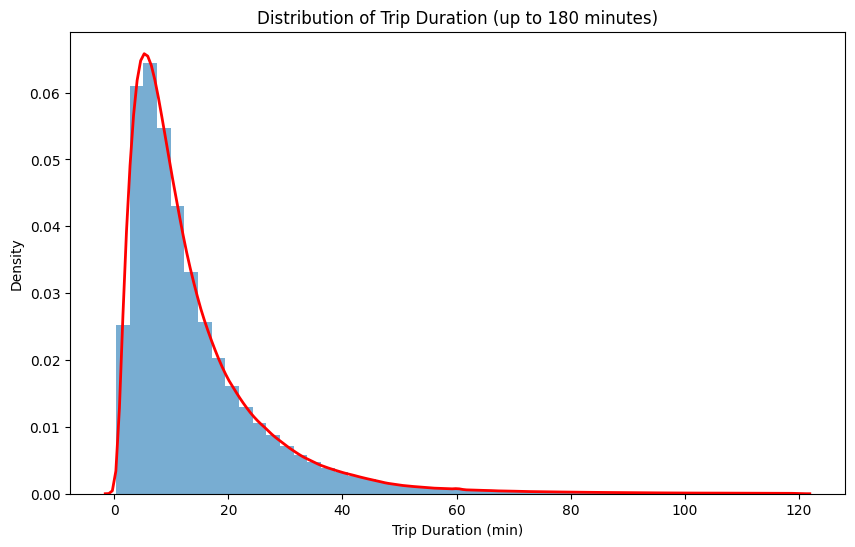

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df_clean['tripduration'], bins=50, alpha=0.6, density=True)
sns.kdeplot(df_clean['tripduration'], color='red', linewidth=2)

plt.title("Distribution of Trip Duration (up to 180 minutes)")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Density")
plt.show()

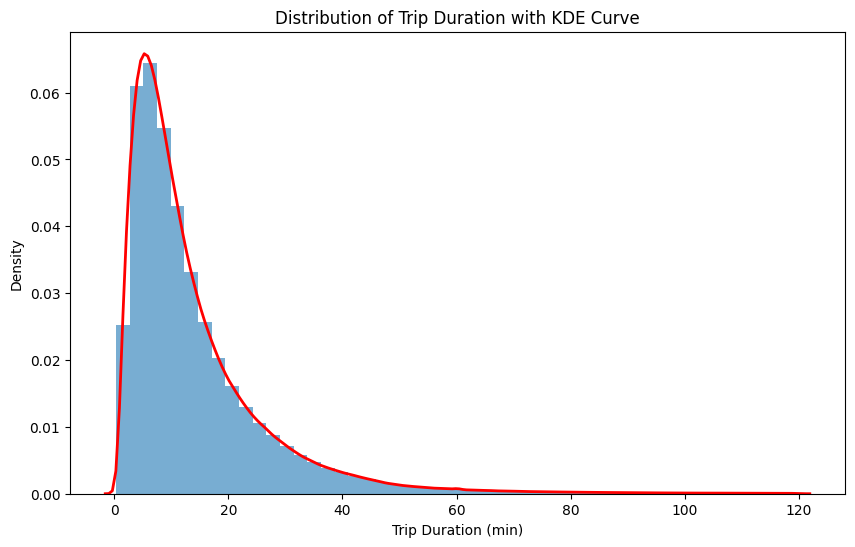

In [24]:
plt.figure(figsize=(10,6))

# Histogram
plt.hist(df_clean['tripduration'], bins=50, alpha=0.6, density=True)

# KDE curve
sns.kdeplot(df_clean['tripduration'], color='red', linewidth=2)

plt.title("Distribution of Trip Duration with KDE Curve")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Density")
plt.show()